# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
# Powers Dataframe
powers_df = pd.read_csv('super_hero_powers.csv')
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
# Heroes Dataframe
heroes_df = pd.read_csv('heroes_information.csv')
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
heroes_df.drop('Unnamed: 0',axis=1,inplace=True)
heroes_df.head(2)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
print('HEROES INFORMATION')
print('===================')
print(str(heroes_df.shape[0]) + ' rows & ' + str(heroes_df.shape[1]) + ' columns.')
print('')
print('Columns are named: ' + str(heroes_df.columns))
print('')
print('Data types are: ')
heroes_df.info()
print("")
print('Descriptive statistics:')
heroes_df.describe()

HEROES INFORMATION
734 rows & 10 columns.

Columns are named: Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

Data types are: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB

Descriptive statistics:


,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [6]:
print('POWERS INFORMATION')
print('===================')
print(str(powers_df.shape[0]) + ' rows & ' + str(powers_df.shape[1]) + ' columns.')
print('')
print('Columns are named: ' + str(powers_df.columns))
print('')
print('Data types are: ')
powers_df.info()
print("")
print('Descriptive statistics:')
powers_df.describe()

POWERS INFORMATION
667 rows & 168 columns.

Columns are named: Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)

Data types are: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB

Descriptive statistics:


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,John Constantine,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [7]:
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


In [8]:
# Find how many entries in Skin color are missing
dashes = 0
info = 0
for color in heroes_df['Skin color']:
    if color == '-':
        dashes += 1
    else:
        info += 1
total = info + dashes
print('There are ' + str(dashes) + ' entries missing.')
print('There are a total of ' + str(total) + ' entries.')


There are 662 entries missing.
There are a total of 734 entries.


In [9]:
# Delete Skin color column. Too many missing entries

heroes_df.drop(['Skin color'], axis=1, inplace=True)

In [10]:
# Find how many entries in Eye color are missing
dashes = 0
info = 0
for color in heroes_df['Eye color']:
    if color == '-':
        dashes += 1
    else:
        info += 1
total = info + dashes
print('There are ' + str(dashes) + ' entries missing.')
print('There are a total of ' + str(total) + ' entries.')




There are 172 entries missing.
There are a total of 734 entries.


In [11]:
# Find out how many eye colors there are
heroes_df['Eye color'].value_counts(normalize=True)

blue                       0.306540
-                          0.234332
brown                      0.171662
green                      0.099455
red                        0.062670
black                      0.031335
yellow                     0.025886
white                      0.023161
grey                       0.008174
hazel                      0.008174
purple                     0.005450
gold                       0.004087
amber                      0.002725
violet                     0.002725
yellow (without irises)    0.002725
bown                       0.001362
yellow / blue              0.001362
silver                     0.001362
white / red                0.001362
green / blue               0.001362
indigo                     0.001362
blue / white               0.001362
yellow / red               0.001362
Name: Eye color, dtype: float64

In [12]:
# Assign eye colors based on probabilities
# colors: blue, brown, green, red, black, yellow, white
color_prob = [.35,.25, .15, .10, .05, 0.05, 0.05]
prob = [i/sum(color_prob) for i in color_prob]

def impute_color(value):
    if value == '-':
        return np.random.choice(['blue','brown','green',
                                 'red','black','yellow','white'], p=prob)
    else:
        return value
heroes_df['Eye color'] = heroes_df['Eye color'].map(lambda x: impute_color(x))
heroes_df
#df.Pclass.value_counts(normalize=True)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,good,-99.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,good,88.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,good,81.0


In [13]:
# Find how many entries in Hair color are missing
dashes = 0
info = 0
for color in heroes_df['Hair color']:
    if color == '-':
        dashes += 1
    else:
        info += 1
total = info + dashes
print('There are ' + str(dashes) + ' entries missing.')
print('There are a total of ' + str(total) + ' entries.')



There are 172 entries missing.
There are a total of 734 entries.


In [14]:
# Find out how many eye colors there are
heroes_df['Hair color'].value_counts(normalize=True)

-                   0.234332
Black               0.215259
Blond               0.134877
Brown               0.117166
No Hair             0.102180
Red                 0.069482
White               0.031335
Auburn              0.017711
Green               0.010899
Strawberry Blond    0.009537
Purple              0.006812
Grey                0.006812
Brown / White       0.005450
Silver              0.005450
blond               0.004087
black               0.004087
Blue                0.004087
Orange              0.002725
Yellow              0.002725
Orange / White      0.001362
Pink                0.001362
Gold                0.001362
Black / Blue        0.001362
Red / White         0.001362
Magenta             0.001362
Brownn              0.001362
Red / Grey          0.001362
Red / Orange        0.001362
Brown / Black       0.001362
Indigo              0.001362
Name: Hair color, dtype: float64

In [15]:
# Assign hair colors based on probabilities
# colors: black, blond, brown, no hair, red, white, auburn, green
color_prob = [.30,.20, .17, .13, .10, 0.05, 0.05]
prob = [i/sum(color_prob) for i in color_prob]

def impute_color(value):
    if value == '-':
        return np.random.choice(['Black','Blond','Brown',
                                 'No Hair','Red','White','Auburn'], p=prob)
    else:
        return value
heroes_df['Hair color'] = heroes_df['Hair color'].map(lambda x: impute_color(x))



In [16]:
# Find how many entries in Gender are missing
dashes = 0
info = 0
for gender in heroes_df['Gender']:
    if gender == '-':
        dashes += 1
    else:
        info += 1
total = info + dashes
print('There are ' + str(dashes) + ' entries missing.')
print('There are a total of ' + str(total) + ' entries.')


There are 29 entries missing.
There are a total of 734 entries.


In [17]:
# Delete rows without a gender. Alternative one could look up 
# genders and manually populate these values. Aintnobodygottimeforthat.
heroes_df = heroes_df[heroes_df['Gender'] != '-']
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,good,-99.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,good,88.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,good,81.0


In [18]:

# Find how many entries in Race are missing
dashes = 0
info = 0
for race in heroes_df['Race']:
    if race == '-':
        dashes += 1
    else:
        info += 1
total = info + dashes
print('There are ' + str(dashes) + ' entries missing.')
print('There are a total of ' + str(total) + ' entries.')


There are 282 entries missing.
There are a total of 705 entries.


In [19]:
heroes_df['Race'].value_counts().head()

-                    282
Human                207
Mutant                63
God / Eternal         12
Human / Radiation     11
Name: Race, dtype: int64

In [20]:
# since there are so many races missing, we are going to delete this column.
heroes_df.drop(['Race'],axis=1,inplace=True)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
# Find how many entries in Height are missing
dashes = 0
info = 0
for height in heroes_df['Height']:
    if height == -99.0:
        dashes += 1
    else:
        info += 1
total = info + dashes
print('There are ' + str(dashes) + ' entries missing.')
print('There are a total of ' + str(total) + ' entries.')


There are 203 entries missing.
There are a total of 705 entries.


In [22]:
# height is usually related to sex
#first let's replace null values with NaNs
#heroes_df = heroes_df.replace(-99.0, np.nan)
#heroes_df
# find mean heights for each gender
#heroes_df.groupby(['Gender'])['Height'].median()

# we commented this out after finding that:
# median height for females: 170
# median height for males: 185



In [23]:
heroes_df.reset_index(inplace=True)

In [24]:
heroes_df.isna().any()

index         False
name          False
Gender        False
Eye color     False
Hair color    False
Height        False
Publisher      True
Alignment     False
Weight         True
dtype: bool

In [25]:
heroes_df['Height'][0]

203.0

In [26]:
for index in range(0,len(heroes_df)):
    if heroes_df.Height[index] == -99.0:
        if heroes_df.Gender[index] == 'Female':
            heroes_df['Height'][index] = 170.0
        else:
            heroes_df['Height'][index] = 185.0
    else:
        continue

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
heroes_df.groupby(['Gender'])['Weight'].median()

Gender
Female    54.0
Male      79.0
Name: Weight, dtype: float64

In [28]:
for index in range(0,len(heroes_df)):
    if heroes_df.Weight[index] == -99.0:
        if heroes_df.Gender[index] == 'Female':
            heroes_df['Weight'][index] = 54.0
        else:
            heroes_df['Weight'][index] = 79.0
    else:
        continue
    

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [41]:
# let's find out any other na values
heroes_df.isna().sum()

index          0
name           0
Gender         0
Eye color      0
Hair color     0
Height         0
Publisher     13
Alignment      0
Weight         1
dtype: int64

In [42]:
heroes_df = heroes_df.dropna()
heroes_df.isna().sum()

index         0
name          0
Gender        0
Eye color     0
Hair color    0
Height        0
Publisher     0
Alignment     0
Weight        0
dtype: int64

In [50]:
# deleted any left-over null values after trying our best to keep most
# of the data for heroes_df
num = 734 - len(heroes_df)
print('Deleted ' + str(num) + ' records.' )

Deleted 42 records.


In [51]:
# We checked powers_df for na values, none were found
# powers_df.isna().sum()

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [55]:
heroes_df.set_index('name', inplace=True)
heroes_df.head(4)

,index,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
name,,,,,,,,
A-Bomb,0,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0
Abe Sapien,1,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0
Abin Sur,2,Male,blue,No Hair,185.0,DC Comics,good,90.0
Abomination,3,Male,green,No Hair,203.0,Marvel Comics,bad,441.0


In [57]:
powers_df.set_index('hero_names', inplace=True)
powers_df.head(4)

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
joined_df = heroes_df.join(powers_df)
joined_df.head(2)

,index,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,0,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,1,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [64]:
joined_male_df = joined_df[joined_df['Gender']=='Male']
joined_female_df = joined_df[joined_df['Gender']=='Female']

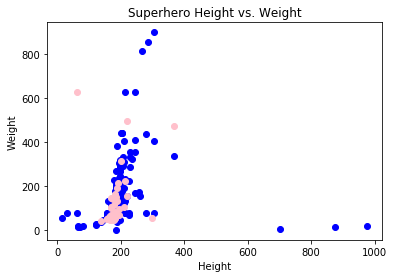

In [68]:
x = joined_male_df['Height']
y = joined_male_df['Weight']
x1 = joined_female_df['Height']
y1 = joined_female_df['Weight']
plt.scatter(x,y, color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Superhero Height vs. Weight')
plt.scatter(x1,y1,color ='pink')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [78]:
def show_distplot(dataframe, column_name):
    ax = sns.distplot(dataframe[column_name])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


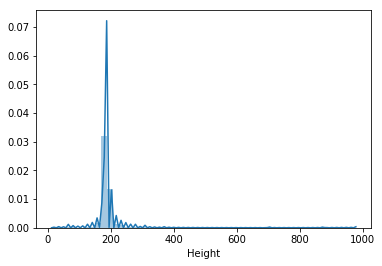

In [80]:
# Male Height
show_distplot(joined_male_df,'Height')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


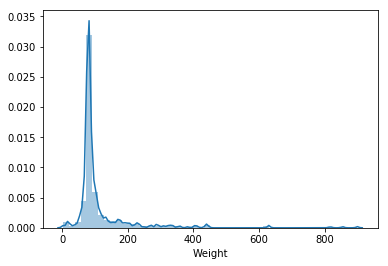

In [81]:
# Male Weight
show_distplot(joined_male_df,'Weight')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


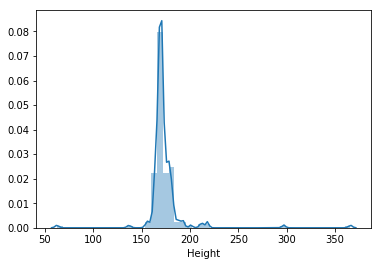

In [82]:
# Female Height
show_distplot(joined_female_df,'Height')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


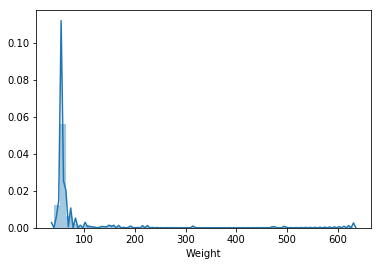

In [83]:
# Female Weight
show_distplot(joined_female_df,'Weight')

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____Overall,heroines are lighter and taller, while heros are tall and heavier. The data is "peaky" meaning most values are around the same median value. There are only a few outliers. ________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [89]:
# Most common powers
powers_df.sum().sort_values(ascending=False).head(5)

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

In [107]:
marvel_df = joined_df[joined_df['Publisher']=='Marvel Comics']


In [113]:
marvel_df = marvel_df.iloc[:,8:]

In [115]:
# Most common powers in Marvel Universe
marvel_df.sum().sort_values(ascending=False).head(5)

Super Strength    196.0
Stamina           148.0
Super Speed       132.0
Flight            104.0
Reflexes           95.0
dtype: float64

In [116]:
dc_df = joined_df[joined_df['Publisher']=='DC Comics']

In [117]:
# Most common powers in DC Universe
dc_df = dc_df.iloc[:,8:]
dc_df.sum().sort_values(ascending=False).head(5)

Super Strength    108.0
Stamina            90.0
Flight             85.0
Super Speed        79.0
Agility            71.0
dtype: float64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
These are common powers and are the most popular. People like these powers.
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
___________________________________________________________________________Heroes with most superpowers
Heroines wiht most superpowers_________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [122]:
male_powers = joined_male_df.iloc[:,8:]
female_powers = joined_female_df.iloc[:,8:]

In [125]:
male_powers['Number of Powers'] = male_powers.sum(axis=1)
female_powers['Number of Powers'] = female_powers.sum(axis=1)

In [128]:
# Top ten most powerful heros
male_powers['Number of Powers'].sort_values(ascending=False).head(10)

Spectre              147.0
Amazo                132.0
Martian Manhunter    105.0
Captain Marvel        99.0
T-1000                96.0
Galactus              96.0
Mister Mxyzptlk       93.0
Thanos                93.0
Odin                  93.0
Cable                 90.0
Name: Number of Powers, dtype: float64

In [129]:
# Top ten most powerful heroines
female_powers['Number of Powers'].sort_values(ascending=False).head(10)

Captain Marvel    33.0
T-X               33.0
Wonder Woman      30.0
Supergirl         27.0
Nova              24.0
Power Girl        24.0
Faora             19.0
Phoenix           18.0
Cheetah III       18.0
Vixen             17.0
Name: Number of Powers, dtype: float64

Text(0, 0.5, 'Number of Powers')

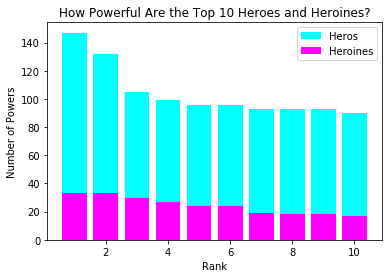

In [144]:
x = list(range(1,11))
y = male_powers['Number of Powers'].sort_values(ascending=False).head(10)
y1 = female_powers['Number of Powers'].sort_values(ascending=False).head(10)
plt.bar(x,y,color='cyan')
plt.bar(x,y1,color='magenta')
plt.title('How Powerful Are the Top 10 Heroes and Heroines?')
plt.xlabel('Rank')

plt.legend(labels=['Heros','Heroines'])
plt.ylabel('Number of Powers')

In [ ]:
# Even though superhero movies are fantasy
# it looks like they follow historical gender biases.

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data